In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import networkx as nx
from IPython.display import display

%matplotlib inline


In [31]:
os.chdir("/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Data") # Sets working directory
df = pd.read_csv("az_beds.csv",encoding = 'unicode_escape') # Loads data from working directory and assigns name 'df'
df.head()# Displays statistical descriptions of df

Bed_Number  beds_1A  gsize_1A  facies_1A  lith_1A  amal_1A  beds_1B  \
0           1     25.0       2.0        1.0      1.0      1.0     39.0   
1           2      8.0       2.0        1.0      1.0      1.0     80.0   
2           3     24.0       3.0        4.0      1.0      0.0     24.0   
3           4      8.0       2.0        1.0      1.0      0.0      1.0   
4           5     15.0       3.0        4.0      1.0      1.0     10.0   

   gsize_1B  facies_1B  lith_1B  ...  beds_10A  gsize_10A  facies_10A  \
0       2.0        1.0      1.0  ...       5.0        3.0         3.0   
1       5.0        5.0      1.0  ...       1.5        1.0         1.0   
2       4.0        4.0      1.0  ...       6.0        3.0         3.0   
3       1.0        1.0      1.0  ...      10.0        1.0         1.0   
4       2.0        1.0      1.0  ...      15.0        3.0         4.0   

   lith_10A  amal_10A  beds_11A  gsize_11A  facies_11A  lith_11A  amal_11A  
0       1.0       NaN      53.0        3.0         6.0       2.0       NaN  
1       1.0       NaN       6.0        1.0         1.0       1.0       NaN  
2       1.0       NaN      10.0        7.0         3.0       2.0       NaN  
3       1.0       NaN       4.0        2.0         1.0       NaN       NaN  
4       1.0       NaN       1.0        3.0         3.0       1.0       1.0  

[5 rows x 106 columns]

In [32]:
df.facies_5C.values

array([ 1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  3.,  1.,  4.,  1.,  3.,
        1.,  3.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,  4.,
        1.,  3.,  1.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,  3.,  1.,  3.,
        3.,  1.,  3.,  3.,  1.,  3.,  3.,  1.,  3.,  4.,  1.,  3.,  1.,
        3.,  1.,  3.,  4.,  1.,  3.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,
        1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,
        3.,  1.,  3.,  7.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,
        4.,  1.,  4.,  1.,  4.,  1.,  4.,  1.,  3.,  1.,  3.,  3.,  4.,
        1.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  3.,  1.,  3.,  1.,  3.,
        1.,  3.,  1.,  1.,  7., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [39]:
facies_5C = [1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  3.,  1.,  4.,  1.,  3.,
        1.,  3.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,  4.,
        1.,  3.,  1.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,  3.,  1.,  3.,
        3.,  1.,  3.,  3.,  1.,  3.,  3.,  1.,  3.,  4.,  1.,  3.,  1.,
        3.,  1.,  3.,  4.,  1.,  3.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,
        1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,
        3.,  1.,  3.,  7.,  1.,  3.,  1.,  3.,  1.,  3.,  1.,  4.,  1.,
        4.,  1.,  4.,  1.,  4.,  1.,  4.,  1.,  3.,  1.,  3.,  3.,  4.,
        1.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  3.,  1.,  3.,  1.,  3.,
        1.,  3.,  1.,  1.,  7]

In [40]:
pd.crosstab(pd.Series(facies_5C[1:],name='Tomorrow'),
            pd.Series(facies_5C[:-1],name='Today'),normalize=0).values

array([[0.03703704, 0.72222222, 0.22222222, 0.01851852],
       [0.80769231, 0.17307692, 0.01923077, 0.        ],
       [0.76923077, 0.23076923, 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [41]:
series = pd.crosstab(pd.Series(facies_5C[1:],name='Tomorrow'),
            pd.Series(facies_5C[:-1],name='Today'),normalize=0)
series.round(2)

Today      1.0   3.0   4.0   7.0
Tomorrow                        
1.0       0.04  0.72  0.22  0.02
3.0       0.81  0.17  0.02  0.00
4.0       0.77  0.23  0.00  0.00
7.0       0.50  0.50  0.00  0.00

In [47]:
states = [('1'),('3'),('4'),('7')]
pi = series.loc[1.0,:].values      
pi = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

NameError: name 'state_space' is not defined

In [48]:
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = series.loc[1.0,:].values.round(2)      
q_df.loc[states[1]] = series.loc[3.0,:].values.round(2)  
q_df.loc[states[2]] = series.loc[4.0,:].values.round(2)   
q_df.loc[states[3]] = series.loc[7.0,:].values.round(2) 
# q_df.loc[states[6]] = series.loc[7.0,:].values.round(2) 

display(q_df)

q_df.to_excel("/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Markov/markov_facies_5C.xlsx")
q_df.to_csv("/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Markov/markov_facies_5C.csv")

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

1     3     4     7
1  0.04  0.72  0.22  0.02
3  0.81  0.17  0.02     0
4  0.77  0.23     0     0
7   0.5   0.5     0     0


 [[0.04 0.72 0.22 0.02]
 [0.81 0.17 0.02 0.0]
 [0.77 0.23 0.0 0.0]
 [0.5 0.5 0.0 0.0]] (4, 4) 

1    1.0
3    1.0
4    1.0
7    1.0
dtype: float64


In [49]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
            
pprint(edges_wts)

{('1', '1'): 0.04,
 ('1', '3'): 0.72,
 ('1', '4'): 0.22,
 ('1', '7'): 0.02,
 ('3', '1'): 0.81,
 ('3', '3'): 0.17,
 ('3', '4'): 0.02,
 ('3', '7'): 0.0,
 ('4', '1'): 0.77,
 ('4', '3'): 0.23,
 ('4', '4'): 0.0,
 ('4', '7'): 0.0,
 ('7', '1'): 0.5,
 ('7', '3'): 0.5,
 ('7', '4'): 0.0,
 ('7', '7'): 0.0}


Nodes:
['1', '3', '4', '7']

Edges:
OutMultiEdgeDataView([('1', '1', {'weight': 0.04, 'label': 0.04}), ('1', '3', {'weight': 0.72, 'label': 0.72}), ('1', '4', {'weight': 0.22, 'label': 0.22}), ('1', '7', {'weight': 0.02, 'label': 0.02}), ('3', '1', {'weight': 0.81, 'label': 0.81}), ('3', '3', {'weight': 0.17, 'label': 0.17}), ('3', '4', {'weight': 0.02, 'label': 0.02}), ('3', '7', {'weight': 0.0, 'label': 0.0}), ('4', '1', {'weight': 0.77, 'label': 0.77}), ('4', '3', {'weight': 0.23, 'label': 0.23}), ('4', '4', {'weight': 0.0, 'label': 0.0}), ('4', '7', {'weight': 0.0, 'label': 0.0}), ('7', '1', {'weight': 0.5, 'label': 0.5}), ('7', '3', {'weight': 0.5, 'label': 0.5}), ('7', '4', {'weight': 0.0, 'label': 0.0}), ('7', '7', {'weight': 0.0, 'label': 0.0})])


/Users/euan-soutter/anaconda3/envs/field_data/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/euan-soutter/anaconda3/envs/field_data/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


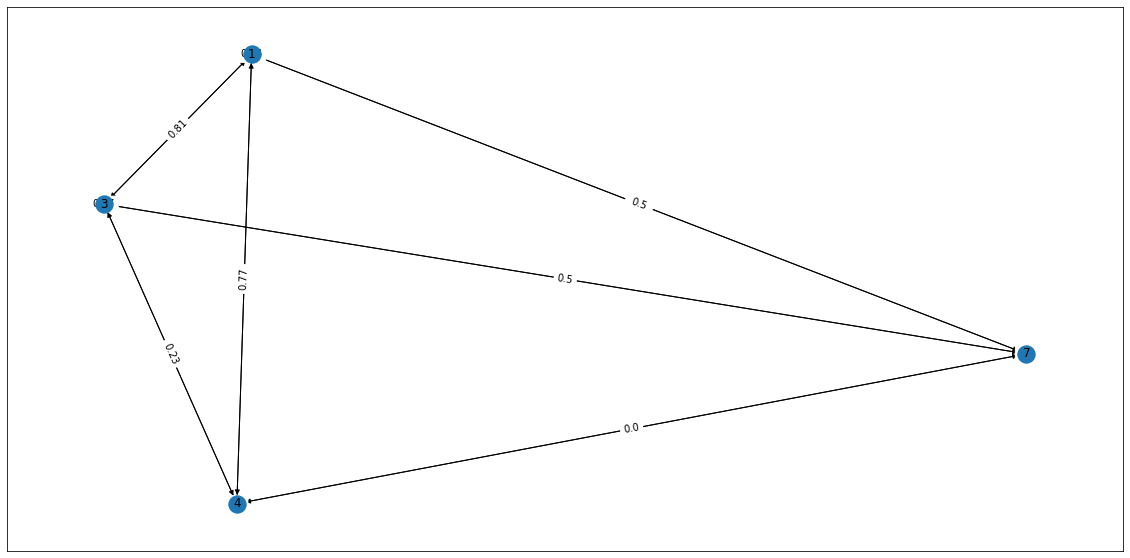

In [50]:
# create graph object
fig, ax = plt.subplots(figsize=(20,10))

G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'core_m27_m5_4_markov.dot')